## Setup

In [16]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Loading the data

In [2]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    return data

def explore_data(data):
    print(data.head().T)
    print(data.describe())
    print(data.info())

## Visualizing the data

In [3]:
def plot_histograms(data):
    data.hist(bins=15, figsize=(15, 10))
    plt.show()

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 8))
    plt.show()

def plot_feature_relationships(data, target):
    for column in data.columns[:-1]:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='quality', y=column, data=data)
        plt.title(f'Relationship between wine quality and {column}')
        plt.show()

## Preprocessing and Feature Engineering

In [ ]:
def scale_features(data, target):
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(data.drop(target, axis = 1))
    data_scaled = pd.DataFrame(features_scaled, columns=data.columns[:-1])
    data_scaled[target] = data[target]
    return data_scaled

## Splitting the dataset

In [5]:
def split_data(data, target, test_size = 0.2, random_state = 42):
    X = data.drop(target, axis = 1)
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

## Training the model

In [6]:
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model

## Evaluating the model

In [7]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

## Cross Validation

In [8]:
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    print("Average accuracy with CV:", np.mean(scores))

In [9]:
def main(filepath):
    data = load_data(filepath)
    explore_data(data)
    plot_histograms(data)
    plot_correlation_matrix(data)
    plot_feature_relationships(data, 'quality')

    data_scaled = scale_features(data, 'quality')
    X_train, X_test, y_train, y_test = split_data(data_scaled, 'quality')
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    cross_validate_model(model, data_scaled.drop('quality', axis = 1), data_scaled['quality'])

                            0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000
Id                     0.0000   1.0000   2.000   3.000   4.0000
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.0

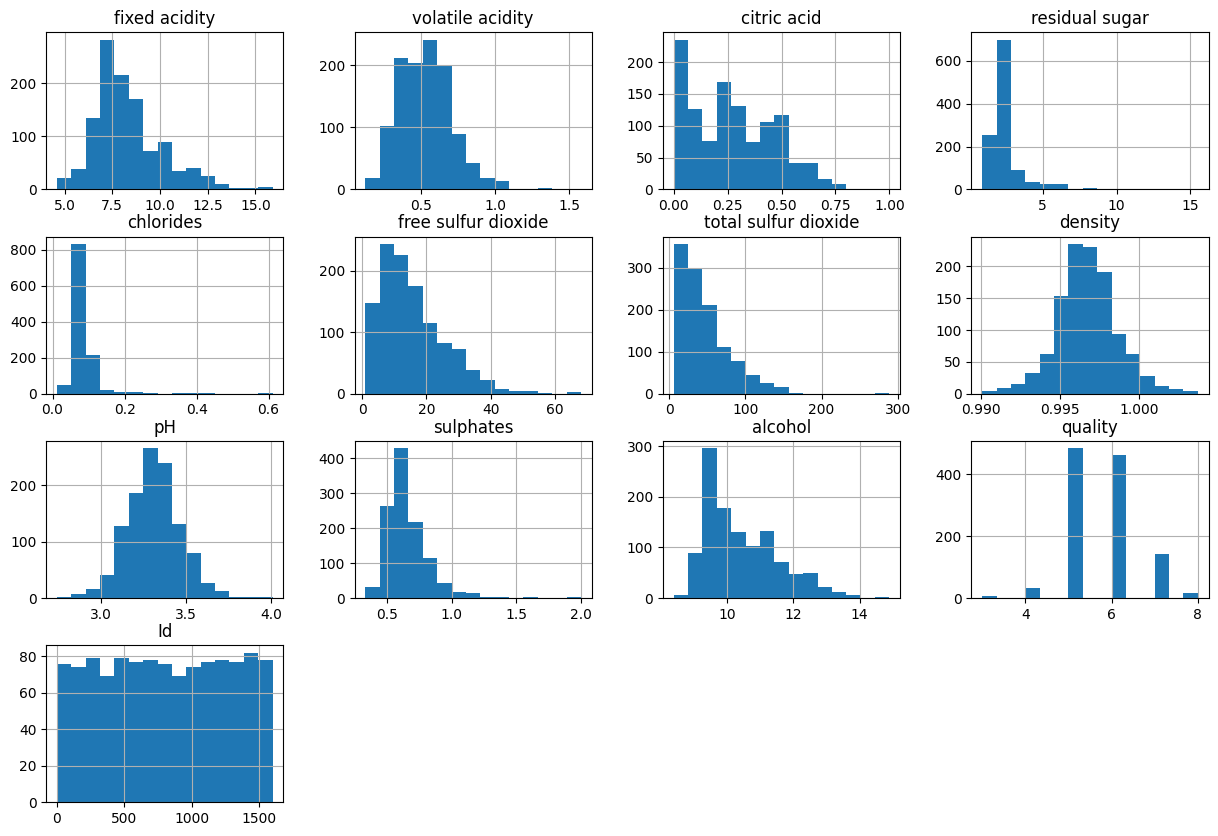

<Figure size 1200x800 with 0 Axes>

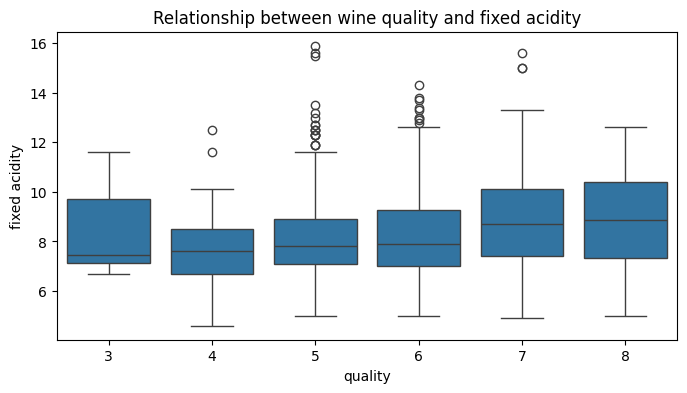

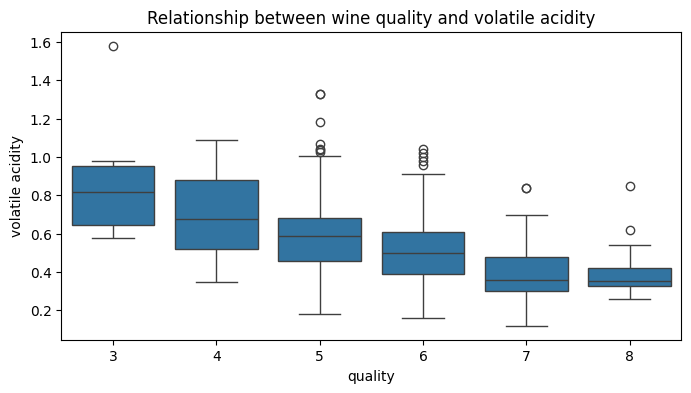

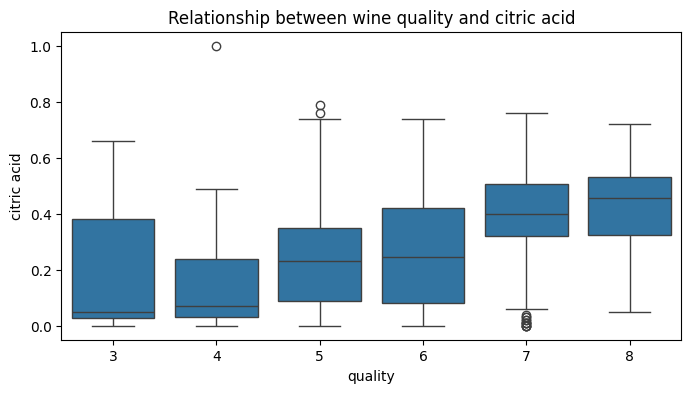

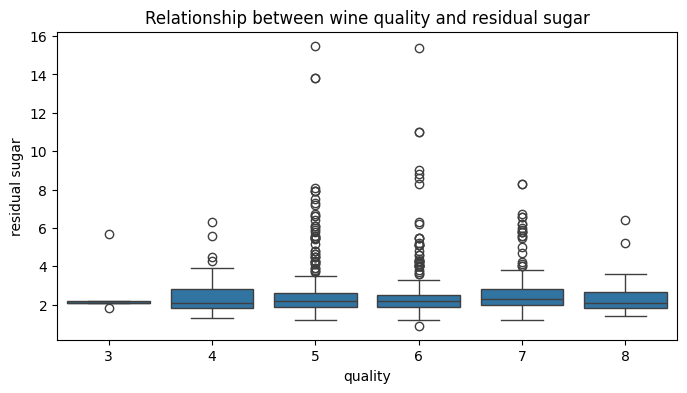

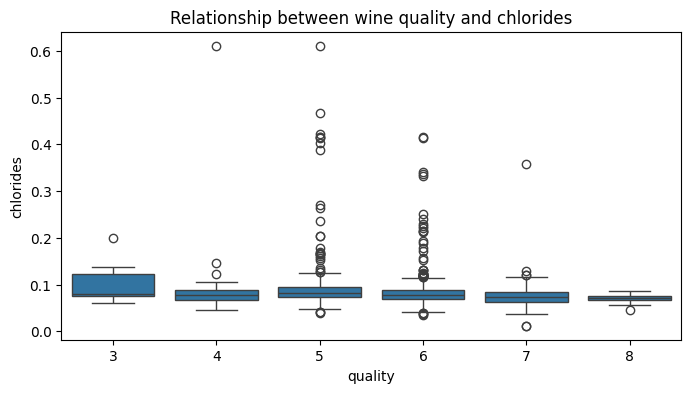

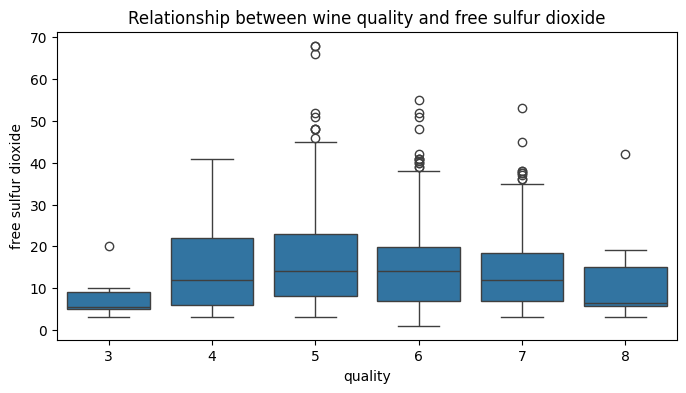

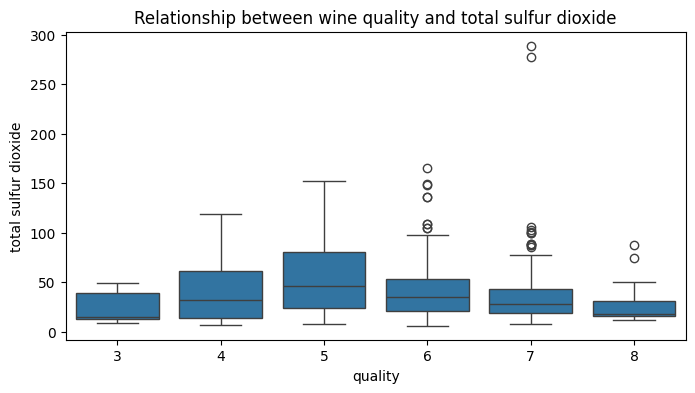

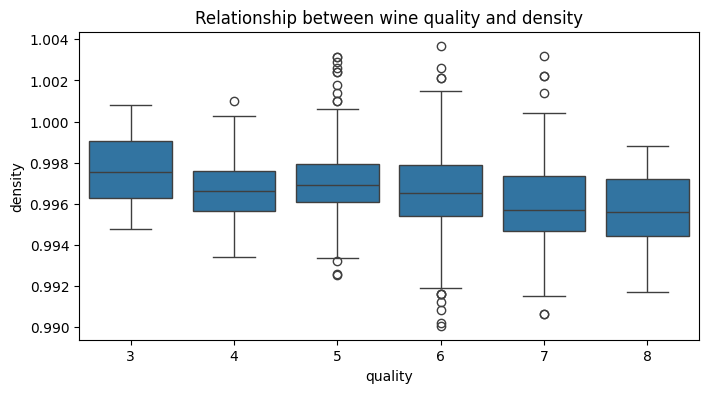

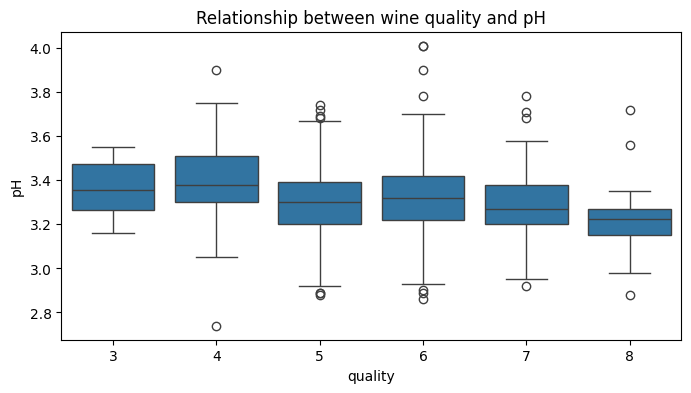

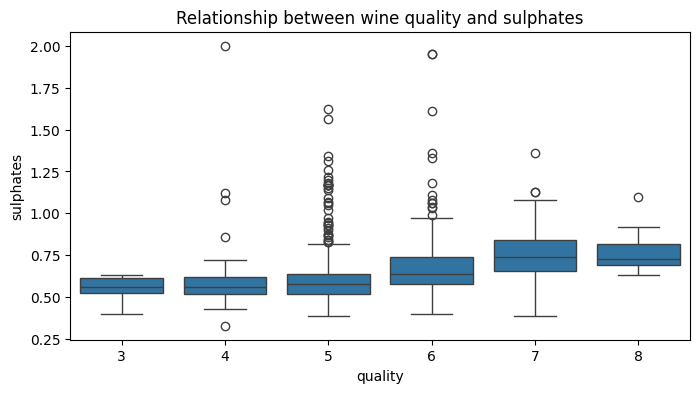

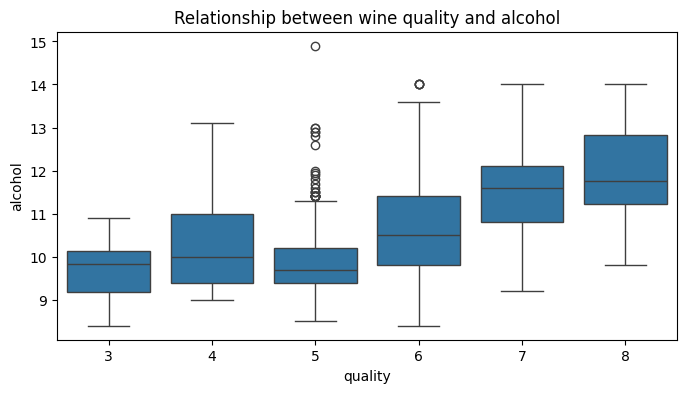

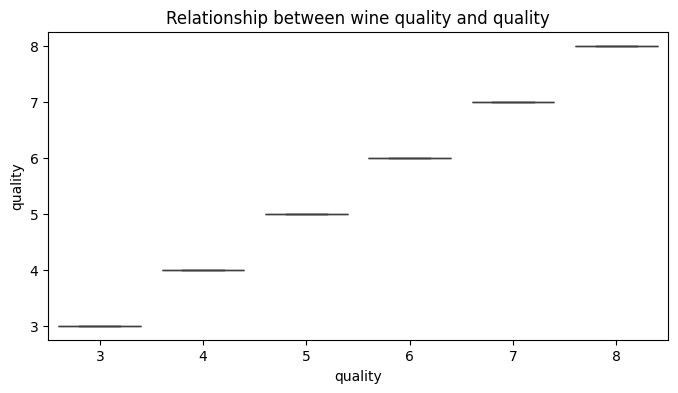

Confusion Matrix
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.62      0.64      0.63        99
           7       0.48      0.42      0.45        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.36      0.36      0.36       229
weighted avg       0.61      0.63      0.62       229



/Users/rich/Library/Caches/pypoetry/virtualenvs/src-65Aqblxe-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rich/Library/Caches/pypoetry/virtualenvs/src-65Aqblxe-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rich/Library/Caches/pypoetry/virtualenvs/src-65Aqblxe-py3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

Average accuracy with CV: 0.5923121121581246


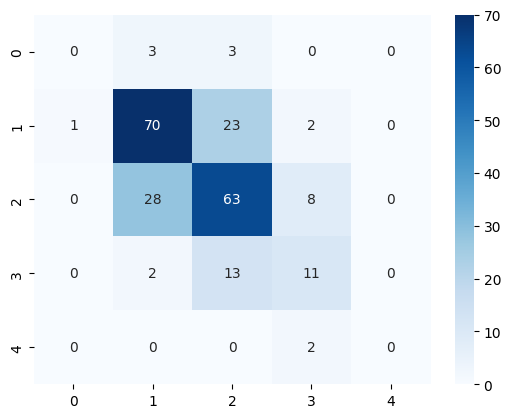

In [17]:
main('/Users/rich/Documents/mlops_clase/demo_mlops/data/raw/WineQT.csv')